# Study of the dynamic of blocking
In this notebook a plot of the blocking over europe is performed, studying the movement of the center of mass of the various events

In [111]:
#import some basic classes
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.pyplot as plt

#my own classes
from lib.BlockTools import BlockTools
import lib.BlockPlots as BP
import lib.BlockTools as BT

Declaring the file location

In [112]:
fn = "/home/guest/work/michele/data/ERA5/processed/"+\
         "ERA5_pIB_daily_djfm_northem_1995-2000.nc"
fn_out = "/home/guest/work/michele/data/ERA5/processed/"+\
         "ERA5_pIB_tracked_daily_djfm_northem_1995-2000.nc"
output = "/home/guest/work/michele/prog/plots/center_of_mass/try.png"

### Produce the array of the center of masses coordinates

In the following part the methods from BlockTools class are used.

In [113]:
ds = xr.load_dataset(fn_out)
lons,lats,dat1,dat2 = BP.check_zg_pIB(ds,"zg","pIB_tracked")
#find europe indexes
lonE = [BT.GetIndex(ds,"lon","-10.0"),BT.GetIndex(ds,"lon","40.0")]
latE = [BT.GetIndex(ds,"lat","30.0"),BT.GetIndex(ds,"lat","75.0")]
print(lonE,latE)
dat2 = np.ma.masked_equal(dat2,0)#mask array1 when ==0

"""
This loop finds the blocking events that have origin in the
area defined by lonE,latE
"""
#create a list of indexes
print(np.unique(dat2))
indexes = []
for t in range(len(ds["time"].values)):
  for l in np.unique(dat2):
    if l in dat2[t,latE[0]:latE[1],lonE[0]:lonE[1]] and not l in dat2[t-1,:,:]:
      indexes.append(l)
      
"""
Another loop could be implemented that ask for a condition on
the initial center of mass
"""
      
print(indexes)
xs = []
ys = []
for l in indexes:
  x,y = BT.CenterofMass(dat2,l)
  xs.append(x)
  ys.append(y)
#print(xs,ys)

[68, 88] [12, 30]
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 --]
[1, 4, 15, 27]


/usr/lib/python3/dist-packages/scipy/ndimage/measurements.py:1358: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


In [114]:
# ds = xr.load_dataset(fn_out)
# starting_day="1997-01-01T09:00:00.000000000"
# lons,lats,dat1,dat2 = BP.check_zg_pIB(ds,"zg","pIB_tracked")
# #selecting data from the desired days
# index1 = BP.BlockTools.GetIndex(ds,"time",starting_day)
# index2 = index1 + 50
# tuple = dat2
# tuple = tuple[index1:index2,:,:]
# #tuple = BT.OrderIndexes(tuple)
# indexes = np.unique(tuple)
# x,y = BT.CenterofMass(tuple,2)
# #print(indexes,x,y)

### Trajectories Plot

In this plot only blocking event that passes through Europe are plotted.

In [117]:
mapcrs = ccrs.PlateCarree()
datacrs = ccrs.PlateCarree()
extent =[-20,50,20,85]
#extent =[-180,180,0,90]

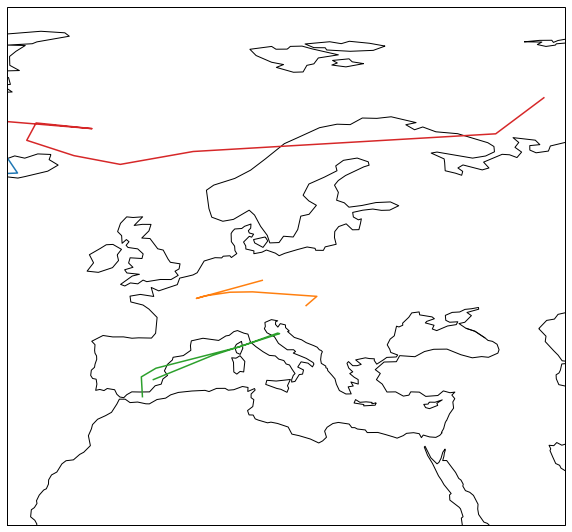

In [118]:
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent(extent, datacrs)
ax.coastlines()
for i in range(len(indexes)):
  cm = plt.plot(ys[i],xs[i],transform=datacrs)

plt.savefig(output,bbox_inches='tight',dpi=180)